# Scikitlearn

In [48]:
from sklearn import datasets
import numpy as np

In [49]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [50]:
# sepal length, petal length
X = iris.data[:, [2, 3]]
# target : 0, 1, 2 (setosa, versicolor, virginica)
y = iris.target[:]

Separar los datos en conjuntos de entrenamiento y pruebas

In [51]:
from sklearn.model_selection import train_test_split 
# 30% test data, 70% training data
# stratify=y means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
# random_state=1 means that the method will return the same training and test subsets if the same random_state is used in the function.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 2) (105,)
(45, 2) (45,)


In [52]:
print('Etiquetas en y       :', np.bincount(y))
print('Etiquetas en y_train :', np.bincount(y_train))
print('Etiquetas en y_test  :', np.bincount(y_test))
# Estratificacion: Las muestras se toman en proporcion a las etiquetas

Etiquetas en y       : [50 50 50]
Etiquetas en y_train : [35 35 35]
Etiquetas en y_test  : [15 15 15]


Preprocesamiento de datos

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()
# Computes the mean and standard deviation for the training data
sc.fit(X_train)
# Standardizes the training data
X_train_std = sc.transform(X_train)
# Golden Rule: Do not standardize the test data using the test set mean and standard deviation
# i.e. DO NOT sc.fit(X_test) and sc.transform(X_test
X_test_std = sc.transform(X_test)

Perceptron

In [55]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [56]:
y_pred = ppn.predict(X_test_std) # y_hat
print('Missclassified samples : ', (y_test != y_pred).sum())

Missclassified samples :  1


In [57]:
# coefficient of the features in the decision function
ppn.coef_

array([[-0.10655204, -0.11836728],
       [ 0.31790327, -0.3670884 ],
       [ 0.36018414,  0.30003858]])

In [58]:
# Score is the accuracy of the model
print('Accuracy : ', ppn.score(X_test_std, y_test))

Accuracy :  0.9777777777777777


In [59]:
from sklearn.metrics import accuracy_score
# Exactitud
print('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.9777777777777777


Graficando las regiones de decision

In [60]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

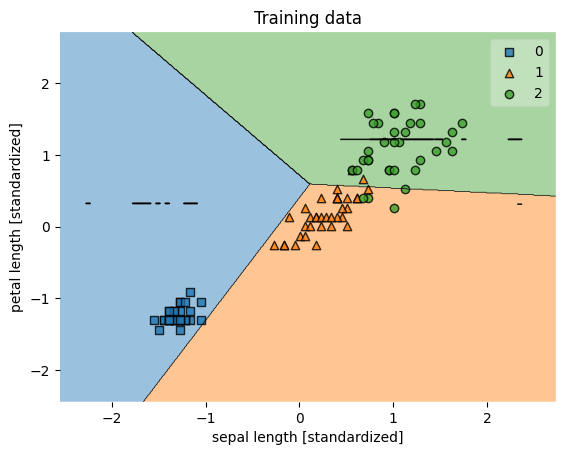

In [61]:
plot_decision_regions(X_train_std, y_train, clf=ppn)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.title('Training data')
plt.show()

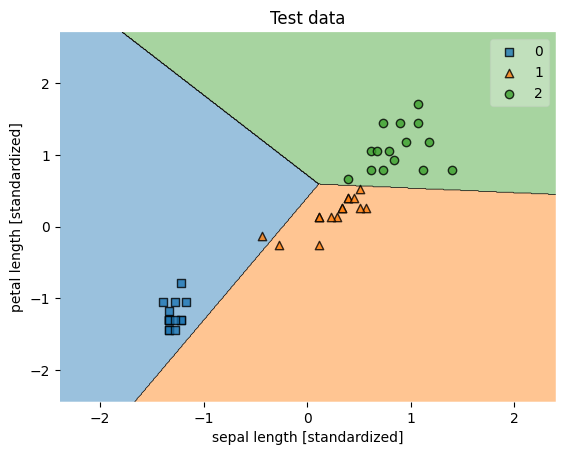

In [62]:
plot_decision_regions(X_test_std, y_test, clf=ppn)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.title('Test data')
plt.show()

### Sigmoide

In [63]:
import numpy as np

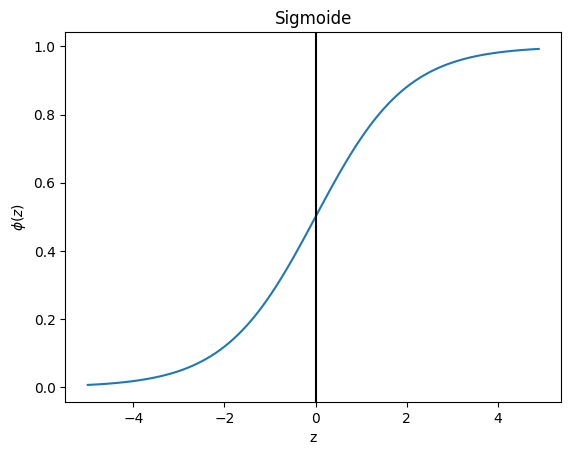

In [73]:
def sigmoide(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-5, 5, 0.1)
phi_z = sigmoide(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.title('Sigmoide')
plt.xlabel('z')
plt.ylabel('$\\phi (z)$')
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

In [66]:
y_hat = lr.predict(X_test_std)
print('Missclassified samples : ', (y_test != y_hat).sum())
print('Accuracy : ', lr.score(X_test_std, y_test))

Missclassified samples :  1
Accuracy :  0.9777777777777777


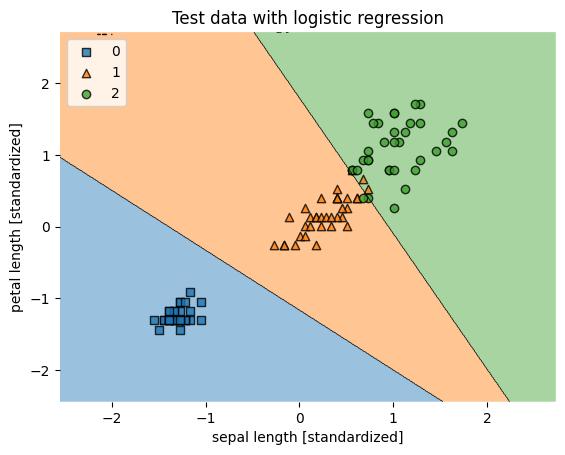

In [67]:
plot_decision_regions(X_train_std, y_train, clf=lr)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.title('Test data with logistic regression')
plt.legend(loc='upper left')
plt.show()

### Support Vector Machines (Modo bootcamp)

Dataset

In [68]:
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target[:]


Training

In [71]:
svm = SVC(kernel='linear', C=0.5)
svm.fit(X, y)

SVC(C=0.5, kernel='linear')

Plot

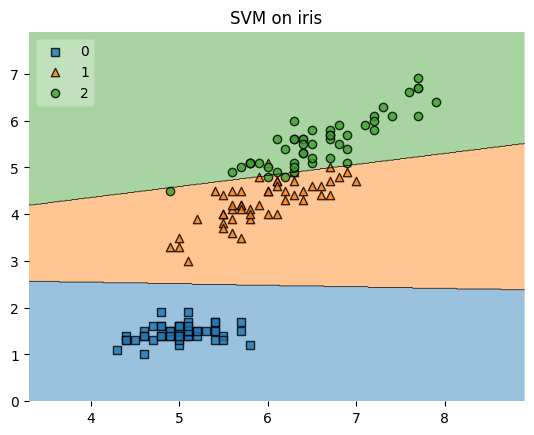

In [72]:
plot_decision_regions(X, y, clf=svm, legend=2)
plt.title('SVM on iris')
plt.show()